In [1]:
from pdeseg import PDE_Segregate

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
# Creating random classification dataset
# - 50 features (5 relevant)
# - 3 classes
X, y = make_classification(
    n_samples=300, n_features=50, n_classes=3, n_informative=5,
    shuffle=False
)
# From scikit documentation:
# Without shuffling, X horizontall stacks features in the following order:
# informative, redundant, duplicated
# Therefore, first five features are relevant

In [3]:
# Initialize PDE-Segregate object
pdeRanker = PDE_Segregate()

In [4]:
# Carry out feature selection
pdeRanker.fit(X, y)

Constructing and evaluating the KDEs per class for every feature ... 
 - Kernels constructed!
Computing intersection areas ...
 - averaging_method: 'mean'


In [5]:
# Get top 10 features
top10Features = pdeRanker.get_topnFeatures(10)

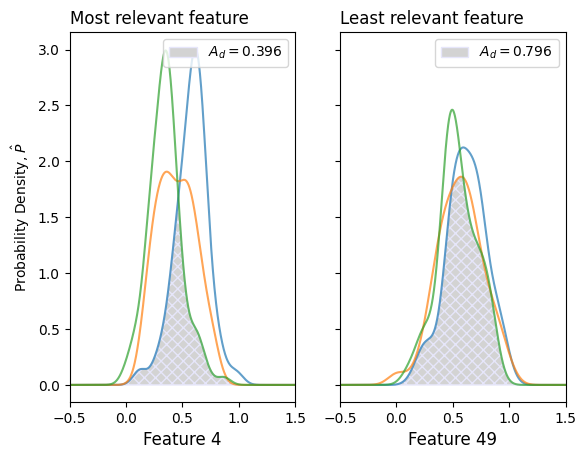

In [6]:
# Visualize the top feature's ability to segregate PDEs
fig, axs = plt.subplots(1, 2, sharey=True)

# Top ranked feature
pdeRanker.plot_overlapAreas(top10Features[0], legend="intersection", _ax=axs[0])
axs[0].set_title("Most relevant feature", loc="left")

# Last ranked feature
axs[1].set_title("Least relevant feature", loc="left")
pdeRanker.plot_overlapAreas(49, legend="intersection", _ax=axs[1])

axs[0].set_ylabel(r"Probability Density, $\hat{P}$")
for i in range(2):
    axs[i].set_xlim(-0.5, 1.5)
    axs[i].set_xticks(np.arange(-0.5, 2.0, 0.5))
plt.savefig("example_plot.svg", format="svg")